In [1]:
# Importing and loading data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [4]:
# Reading the Data

df = pd.read_csv('dataRBL 2.csv')
df

,consumption (binary),soil humidity 2 (gr%/ml),temperature (celcius),air humidity (%),temperature/humidity
0,0,22.83,25.14,94.97,0.264715
1,0,22.88,25.29,95.00,0.266211
2,0,22.43,25.32,95.20,0.265966
3,0,22.51,25.43,96.00,0.264896
4,0,22.55,25.39,96.00,0.264479
...,...,...,...,...,...
750,1,20.38,32.02,15.00,2.134667
751,1,20.43,32.30,15.00,2.153333
752,1,20.74,32.30,15.00,2.153333
753,1,20.36,32.30,15.00,2.153333


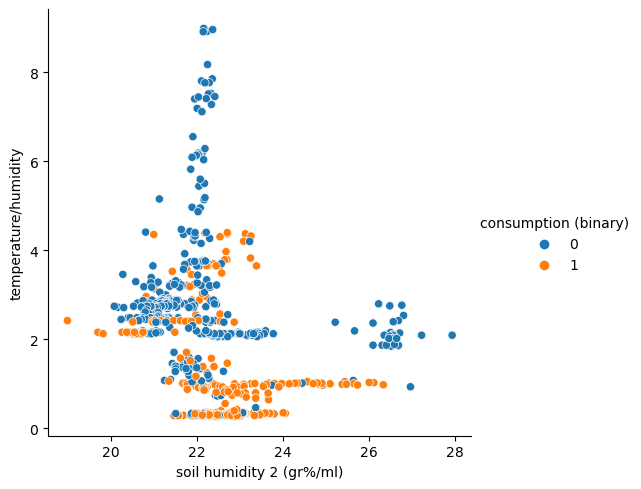

In [5]:
# Data Plotting

sns.relplot(y='temperature/humidity', x='soil humidity 2 (gr%/ml)', hue='consumption (binary)', data = df)

In [24]:
# data prep for modelling
df_model = df.iloc[:, [1,4]].values
df_model

array([[22.83      ,  0.26471517],
       [22.88      ,  0.26621053],
       [22.43      ,  0.26596639],
       ...,
       [20.74      ,  2.15333333],
       [20.36      ,  2.15333333],
       [20.54      ,  2.15333333]])

In [25]:
# Prediction model
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_preds = kmeans.fit_predict(df_model)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

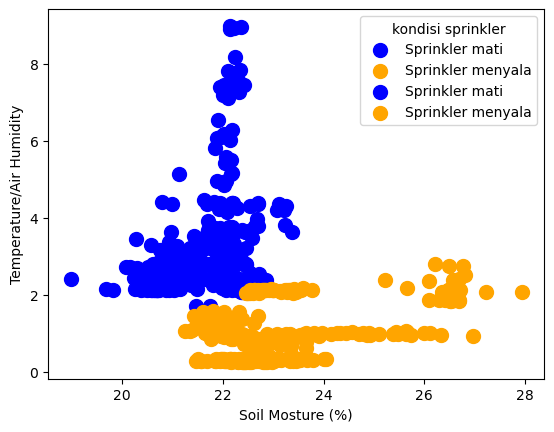

In [29]:
# Plotting

plt.scatter(df_model[y_preds== 0,0], df_model[y_preds == 0,1], 
           s = 100, c = "blue", label = "Sprinkler mati")
plt.scatter(df_model[y_preds== 1,0], df_model[y_preds == 1,1],
           s = 100, c = "orange", label = "Sprinkler menyala")
plt.scatter(df_model[y_preds== 2,0], df_model[y_preds == 2,1],
           s = 100, c = "blue", label = "Sprinkler mati")
plt.scatter(df_model[y_preds== 3,0], df_model[y_preds == 3,1],
           s = 100, c = "orange", label = "Sprinkler menyala")


plt.xlabel("Soil Mosture (%)")
plt.ylabel("Temperature/Air Humidity")

plt.legend(title = "kondisi sprinkler")

In [239]:
### Prediction Output

def predict(x,y):
    if x >= float(28):
        return 0
    else:
        ClusterB = [0,1,0,1]
        Prediction = kmeans.predict([[x, y]])
        return ClusterB[np.squeeze(Prediction)]
    
soil_humid = # masukan nilai kelembaban tanah
temp = # masukan nilai temperatur udara
air_humid = # masukan nilai kelembaban udara
temp_air_ratio = temp/air_humid

predict(sm, temp_air_ratio)